In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
train = pd.read_csv('../data/train.csv') 
print(f"Dataset Shape: {train.shape}")

Dataset Shape: (2048, 787)


C:\Users\박신우\AppData\Local\Temp\ipykernel_36936\1663090485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='digit', data=train, palette='viridis')


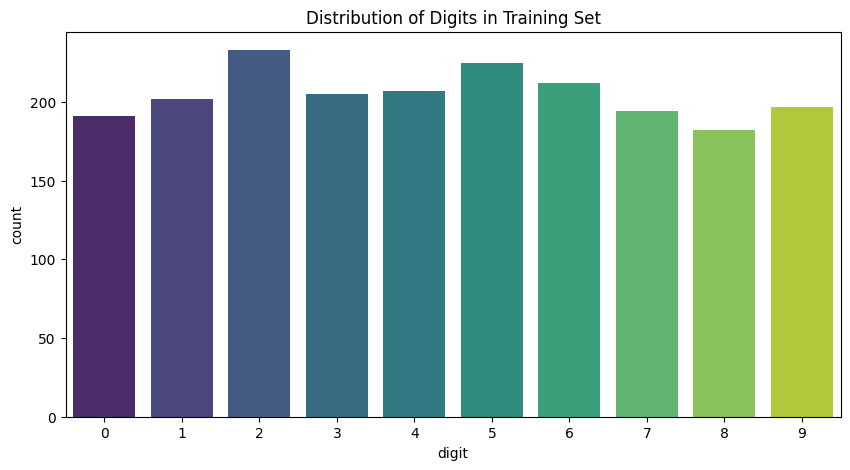

Top 5 background letters:
letter
Z    91
O    90
K    90
L    89
H    89
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(x='digit', data=train, palette='viridis')
plt.title('Distribution of Digits in Training Set')
plt.show()

# 글자(letter) 분포도 확인
print("Top 5 background letters:")
print(train['letter'].value_counts().head())

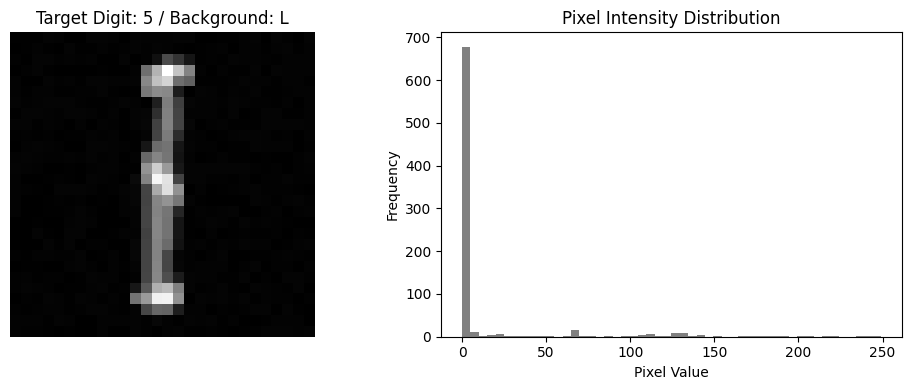

In [ ]:
def visualize_sample(df, idx):
    # 이미지 데이터 추출 (3번 인덱스부터 픽셀)
    img = df.iloc[idx, 3:].values.reshape(28, 28).astype(float)
    digit = df.iloc[idx, 1]
    letter = df.iloc[idx, 2]
    
    plt.figure(figsize=(10, 4))
    
    # 1. 원본 이미지 시각화
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Target Digit: {digit} / Background: {letter}")
    plt.axis('off')
    
    # 2. 픽셀 값 히스토그램 시각화
    plt.subplot(1, 2, 2)
    plt.hist(img.flatten(), bins=50, color='gray')
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

# 샘플 시각화 실행
visualize_sample(train, 0)

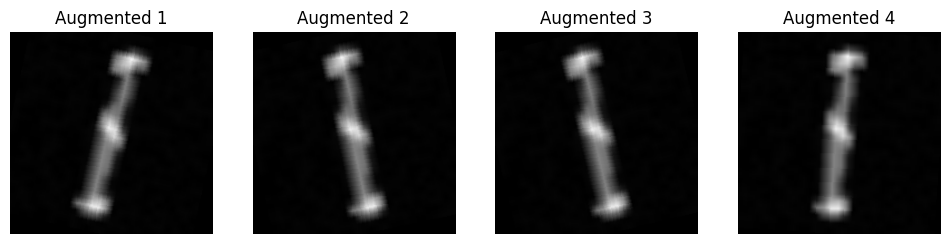

In [5]:
from torchvision import transforms
from PIL import Image

# v2에서 사용한 변환 로직
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15), 
    transforms.ToTensor()
])

# 증강된 이미지 여러 개 출력해보기
img_raw = train.iloc[0, 3:].values.reshape(28, 28).astype(np.uint8)
img_raw_3ch = np.repeat(img_raw[:, :, np.newaxis], 3, axis=2) #

plt.figure(figsize=(12, 3))
for i in range(4):
    augmented_img = preprocess(img_raw_3ch).permute(1, 2, 0)
    plt.subplot(1, 4, i+1)
    plt.imshow(augmented_img)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
plt.show()